# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [15]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request
import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



## 2. Datos

In [16]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv")

In [17]:
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")
sample_sub = pd.read_csv("./data/sample_submission.csv")

print(train.shape, test.shape, sample_sub.shape)
train.head()

(912, 13) (391, 12) (391, 2)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


### 2.1 Exploración de los datos

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [19]:
train.info()
train.isna().sum().sort_values(ascending=False).head(15)
train.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,912.0,NaN,NaN,NaN,650.3125,382.727748,2.0,324.75,636.5,982.25,1320.0
Company,912,19,Lenovo,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,912,480,XPS 13,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,912,6,Notebook,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,912.0,NaN,NaN,NaN,14.981579,1.436719,10.1,14.0,15.6,15.6,18.4
ScreenResolution,912,36,Full HD 1920x1080,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,912,107,Intel Core i5 7200U 2.5GHz,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,912,9,8GB,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,912,37,256GB SSD,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,912,93,Intel HD Graphics 620,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [21]:
df.set_index("laptop_ID", inplace=True)


In [22]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [23]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [24]:
# Feature Engineering + Limpieza - Para no repetir código y que train/test queden iguales.
def feature_engineering(df):
    df = df.copy()

    # 1) RAM: "8GB" -> 8
    df["Ram_GB"] = df["Ram"].str.replace("GB", "", regex=False).astype(float)

    # 2) Weight: "1.86kg" -> 1.86
    df["Weight_kg"] = df["Weight"].str.replace("kg", "", regex=False).astype(float)

    # 3) ScreenResolution: extraer anchura y altura (ej: 1920x1080)
    wh = df["ScreenResolution"].str.extract(r'(?P<width>\d+)\s*x\s*(?P<height>\d+)')
    df["Screen_Width"]  = wh["width"].astype(float)
    df["Screen_Height"] = wh["height"].astype(float)

    # 4) PPI: densidad de píxeles (más informativo que width/height sueltos)
    df["PPI"] = np.sqrt(df["Screen_Width"]**2 + df["Screen_Height"]**2) / df["Inches"]

    # 5) Touchscreen e IPS (flags 0/1)
    df["Touchscreen"] = df["ScreenResolution"].str.contains("Touchscreen", case=False, na=False).astype(int)
    df["IPS_Panel"]   = df["ScreenResolution"].str.contains("IPS", case=False, na=False).astype(int)

    # 6) CPU: marca + GHz
    df["Cpu_Brand"] = df["Cpu"].str.split().str[0]
    df["Cpu_GHz"] = df["Cpu"].str.extract(r'(\d+(\.\d+)?)\s*GHz')[0].astype(float)

    # 7) GPU: marca
    df["Gpu_Brand"] = df["Gpu"].str.split().str[0]

    # 8) Memory: sacar tamaños SSD/HDD/... en GB
    def parse_memory(mem):
        parts = [p.strip() for p in str(mem).split('+')]
        out = {"SSD_GB":0.0, "HDD_GB":0.0, "Flash_GB":0.0, "Hybrid_GB":0.0}

        for p in parts:
            m = re.search(r'(\d+(\.\d+)?)\s*(TB|GB)', p)
            if not m:
                continue

            size = float(m.group(1))
            unit = m.group(3)
            gb = size*1024 if unit == "TB" else size

            pl = p.lower()
            if "ssd" in pl:
                out["SSD_GB"] += gb
            elif "hdd" in pl:
                out["HDD_GB"] += gb
            elif "flash" in pl:
                out["Flash_GB"] += gb
            elif "hybrid" in pl:
                out["Hybrid_GB"] += gb
            else:
                # por si no detecta el tipo, lo dejamos como HDD por defecto
                out["HDD_GB"] += gb

        out["TotalStorage_GB"] = sum(out.values())
        return pd.Series(out)

    mem_feats = df["Memory"].apply(parse_memory)
    df = pd.concat([df, mem_feats], axis=1)

    return df


In [25]:
# Preparar X/y + aplicar Featuring Enginering + borrar columnas “crudas”
target = "Price_in_euros"

X = train.drop(columns=[target])
y = train[target].copy()

# Aplicamos FE a train y test
X_fe = feature_engineering(X)
test_fe = feature_engineering(test)

# Quitamos columnas que son texto “crudo” (ya las convertimos a features)
drop_cols = ["laptop_ID","Product","Cpu","Gpu","ScreenResolution","Memory","Ram","Weight"]
X_fe = X_fe.drop(columns=[c for c in drop_cols if c in X_fe.columns])
test_fe = test_fe.drop(columns=[c for c in drop_cols if c in test_fe.columns])

X_fe.head()


,Company,TypeName,Inches,OpSys,Ram_GB,Weight_kg,Screen_Width,Screen_Height,PPI,Touchscreen,IPS_Panel,Cpu_Brand,Cpu_GHz,Gpu_Brand,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,TotalStorage_GB
0,HP,Notebook,15.6,Windows 10,8.0,1.86,1920.0,1080.0,141.211998,0,0,Intel,2.0,Intel,256.0,0.0,0.0,0.0,256.0
1,Dell,Gaming,15.6,Windows 10,16.0,2.59,1920.0,1080.0,141.211998,0,0,Intel,2.6,Nvidia,0.0,1024.0,0.0,0.0,1024.0
2,HP,Notebook,15.6,Windows 10,8.0,2.04,1920.0,1080.0,141.211998,0,0,Intel,2.7,Nvidia,0.0,1024.0,0.0,0.0,1024.0
3,Apple,Ultrabook,13.3,macOS,8.0,1.34,1440.0,900.0,127.677940,0,0,Intel,1.8,Intel,0.0,0.0,128.0,0.0,128.0
4,Dell,Notebook,15.6,Linux,4.0,2.25,1920.0,1080.0,141.211998,0,0,Intel,2.0,AMD,0.0,1024.0,0.0,0.0,1024.0


In [26]:
corr_target = tmp.corr(numeric_only=True)[target]


NameError: name 'tmp' is not defined

In [ ]:
corr_target = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)


In [ ]:
tmp = X_fe.copy()
tmp[target] = y.values

# Correlación con el target
corr_target = tmp.corr(numeric_only=True)[target]

# Ordenar por valor absoluto
corr_target = corr_target.reindex(
    corr_target.abs().sort_values(ascending=False).index
)

corr_target


Price_in_euros     1.000000
Ram_GB             0.738922
SSD_GB             0.669151
Screen_Height      0.543591
Screen_Width       0.542660
PPI                0.459478
Cpu_GHz            0.427116
IPS_Panel          0.267188
Touchscreen        0.218089
Weight_kg          0.197086
TotalStorage_GB    0.184000
HDD_GB            -0.076017
Inches             0.071043
Flash_GB          -0.042607
Hybrid_GB         -0.037336
Name: Price_in_euros, dtype: float64

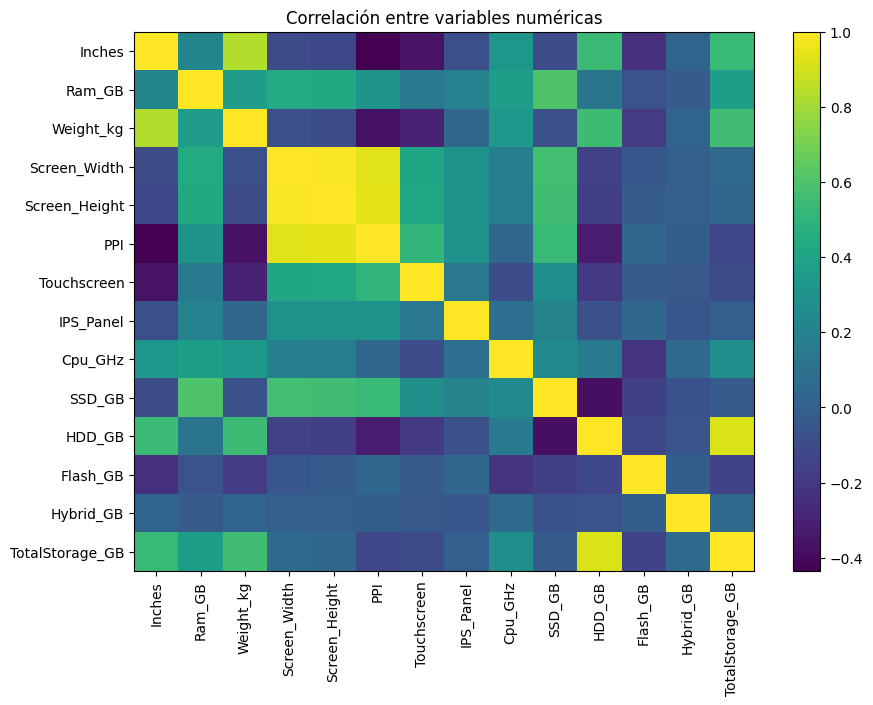

In [ ]:
num_cols = X_fe.select_dtypes(include=[np.number]).columns
corr = X_fe[num_cols].corr()

plt.figure(figsize=(10,7))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlación entre variables numéricas")
plt.show()


In [ ]:
# Separamos columnas categóricas y hacemos one-hot
X_dum = pd.get_dummies(X_fe, drop_first=True)
test_dum = pd.get_dummies(test_fe, drop_first=True)

# IMPORTANTÍSIMO: alinear columnas para que train/test tengan EXACTAMENTE las mismas
X_dum, test_dum = X_dum.align(test_dum, join="left", axis=1, fill_value=0)

print(X_dum.shape, test_dum.shape)


(912, 48) (391, 48)


### 2.3 Definir X e y

In [ ]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 11)

In [ ]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_dum, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)   # fit SOLO con train
X_valid_sc = scaler.transform(X_valid)       # transform valid con el mismo scaler


In [ ]:
model = Ridge(alpha=5.0, random_state=42)
model.fit(X_train_sc, y_train)

pred_valid = model.predict(X_valid_sc)
rmse = np.sqrt(mean_squared_error(y_valid, pred_valid))
rmse


np.float64(352.0350827579326)

In [ ]:
# Escalado usando TODO el train
scaler_final = StandardScaler()
X_full_sc = scaler_final.fit_transform(X_dum)
test_sc   = scaler_final.transform(test_dum)

model_final = Ridge(alpha=5.0, random_state=42)
model_final.fit(X_full_sc, y)

test_preds = model_final.predict(test_sc)
test_preds[:5]


array([1646.59279552,  250.29611695,  249.10303587, 1375.07573967,
        990.96279266])

In [ ]:
# Crear submission con el formato exacto del sample
submission = sample_sub.copy()

# Detectamos automáticamente la columna target de sample_submission
target_col = [c for c in submission.columns if "price" in c.lower()][0]
submission[target_col] = test_preds

submission.head()


,laptop_ID,Price_in_euros
0,209,1646.592796
1,1281,250.296117
2,1168,249.103036
3,1231,1375.075740
4,1020,990.962793


In [ ]:
def chequeador(df_to_submit, sample):
    assert df_to_submit.shape[0] == sample.shape[0], f"❌ Debe tener {sample.shape[0]} filas"
    assert df_to_submit.shape[1] == sample.shape[1], f"❌ Debe tener {sample.shape[1]} columnas"
    assert list(df_to_submit.columns) == list(sample.columns), "❌ Columnas distintas a sample_submission"
    assert df_to_submit.isna().sum().sum() == 0, "❌ Hay nulos en submission"
    print("✅ Submission OK para Kaggle")

chequeador(submission, sample_sub)


✅ Submission OK para Kaggle


In [ ]:
# vamos a hacer la correlacion con el target

# MINI EDA
# Transformacion de ram
# Ordinal encoding
# separar la columna CPU

In [ ]:
y_train

laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [ ]:
# transformar columnas - AQUI HAREMOS TODO EL TRABAJO DE FEATURES ENGINERIING

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [ ]:
y_pred = rf.predict(X_train(features))

NameError: name 'rf' is not defined

### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [ ]:
from sklearn.meatrics.import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
RMSE


### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("./data/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [ ]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg
...,...,...,...,...,...,...,...,...,...,...,...,...
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg


Hay que usar el mismo formato con el que hemos trabajado, en este caso como lo hemos hecho en RAM

In [ ]:
predictions_submit = model.predict(X_pred)
predictions_submit

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [ ]:
sample = pd.read_csv("data/sample_submission.csv", index_col= 0)
sample # este es el formato que tenemos que subir laptop ID con las predicciones

,Price_in_euros
laptop_ID,
209,1949.1
1281,805.0
1168,1101.0
1231,1293.8
1020,1832.6
...,...
820,474.3
948,1468.8
483,520.4


In [ ]:
sample

In [ ]:
sample.head()

In [ ]:
sample.shape

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame()

In [ ]:
submission.head()

In [ ]:
submission.shape

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [27]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [28]:
chequeador(submission)

NameError: name 'submission' is not defined